# Coursera Capstone Project

## The Battle of Neighborhoods 

### Part 1 : Introduction and Data Sections

### Coursera Capstone - REPORT CONTENT

1.	Introduction Section : 
	⁃	Discussion of the business problem and the interested audience in this project.
2.	Data Section:  
	⁃	 Description of the data that will be used to solve the problem and the sources.
3.	Methodology section 
	⁃	Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
4.	Results section 
	⁃	Discussion of the results.
5.	Discussion section 
	⁃	Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
6.	Conclusion section 
	⁃	Report Conclusion.

In [19]:
# A description of the problem and a discussion of the background. (15 marks)

# 1.	Introduction Section : 
### How to choose the Best Location to start an Asian Restaurant in Dammam, Saudi Arabia?



### Description of the Problem and Background :

Opening a restaurant is all about location. However, not every
restaurant is suitable for every location, and vice versa. It comes down to a combination of
restaurant style, target audience, your competitors. If you can define your restaurant type
and identify your target demographic and its most populated areas, you’ll be well on your
way to choosing a restaurant location that sets your business up for success.There’s a lot
of work, planning and preparation that goes into opening a restaurant. Here are a few tips
on how to open a restaurant in Dammam and some steps you’ll need to take in order to
achieve your goal.
1. Restuarant style: The first thing you need to decide is what type of restaurant you want
to open and the style it will hold. Having this set in stone will make the other steps a lot
easier. To make things a little easier, here are three categories you need to consider:
• Food: What type of food will you be serving? Will you specialise in a certain
cuisine?
• Service: What type of service will you be providing? Waiter service? Self-service?
• Atmosphere: What type of atmosphere do you want your establishment to hold?
2. Your Target Market:
In order to open an Indian restaurant in Dammam, you need to be familiar with exactly
who you are aiming to bring into your venue. Are you targeting audience from Indian,
Paskistani, Bangladeshhi and other East Asian origin ? You need to also be aware of the age
group, the location, the amount of money they are willing to spend.
3. Who are your competitors?
As well as familiarising yourself with your audience, you must do so with your
competitors. Look at similar businesses in your area and well-renowned restaurants of
the same category. Consider the ways in which they market themselves and the service
they provide. What works and what doesn’t? You’ll need to be able to compete with
these establishments, so take on board what they’re already doing and better it.
Be aware of the type of your establishment and the number of similar restaurants in
the area you are looking to open it. If there is already a lot of them, chances are you’re
entering business in an over-saturated area and the potential for you to succeed
quickly may be diminished. Consider opening in an area where there is a gap in the
market and demand for your service. However, you must also consider the opposing. If
there are no restaurants in the area similar to your concept, why? It could simply be
that nobody has followed that path yet, or because it will not work. Do your research
to ensure you have the right location to suit your restaurant.
4. Create your menu:
The menu is the core of any restaurant. It’s important you get it right, as it’s the
deciding factor for customers deliberating a visit. Your service could be impeccable,
decor and atmosphere exquisite, but without a menu to match, you shall have no such
luck in success. So when you are targeting the East Asian ethnicity audience, your menu
should include cuisines from India, Pakistan, Bangladesh and other East Asian.
5. Location and Premises:
There are many factors that will contribute to where you decide your premises to be. It
can be challenging to find a venue that will factor in all of your conditions, so it is likely
you will have to compromise on a few things. However, here are the main factors you
should consider when finding premises for your new restaurant:
• Location: How accessible is the location? Are there many competitors
nearby?
• Building type: What type of building would you like your restaurant to be in?
• Target market: Make sure it is in an area where your target market is also.
• Cost: Your ideal location may prove to be a little costly. Make sure that there
is a realistic price point.


In [20]:
# A description of the data and how it will be used to solve the problem. (15 marks)

# 2. Data Section:¶
### Description of the data and its sources that will be used to solve the problem

### Description of the Data:¶

The following data is required to  answer the issues of the problem:

- List of Venu Name and Catagory of Dammam, Saudi Arabia with their geodata (latitud and longitud) 
- List of Indian Resturant in Dammam with their address location 
- number of and distance to Indian restaurants in the neighborhood, if any
- distance of neighborhood from city center


### How the data will be used to solve the problem

The data will be used as follows:
- Use Foursquare and geopy data to map top 100 venues for all Dammam neighborhoods and clustered in groups
- Use foursquare and geopy data to map the location of Indian Resturant , separately and on top of the above clustered map in order to be able to identify the venues and catagory near city center
- centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using Google Maps API reverse geocoding
- coordinate of Dammam center will be obtained using Google Maps API geocoding of well known Dammam location 


### Reference of Venues Name & Catagory in Dammam

In [4]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [5]:

# Dammam, Saudi Arabia
address = 'Dammam, Saudi Arabia'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dammam are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Dammam are 26.4367824, 50.1039991.


In [6]:
neighborhood_latitude=26.4367824
neighborhood_longitude=50.1039991

In [7]:
# @hidden cell
CLIENT_ID = 'KOHIW1QT3ENDODRSQ1U0VJ10A51EYY1F4PPD402FEB1GWXXJ' # Foursquare ID
CLIENT_SECRET = 'JCERQAIDIP0G3H2W1JA0VAUEKHJPM5WVZSVXW50XNTQTXTML' # Foursquare Secret
VERSION = '20200313'

In [8]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KOHIW1QT3ENDODRSQ1U0VJ10A51EYY1F4PPD402FEB1GWXXJ&client_secret=JCERQAIDIP0G3H2W1JA0VAUEKHJPM5WVZSVXW50XNTQTXTML&v=20200313&ll=26.4367824,50.1039991&radius=1500&limit=200'

In [9]:
results = requests.get(url).json()
#results

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
SGnearby_venues = json_normalize(venues) # flatten JSON
#print(SGnearby_venues.columns)
# filter columns
filtered_columns = ['venue.name', 'venue.location.address','venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]

# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)

# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.head()

,name,address,categories,lat,lng,distance
0,Golden Ideas,NaN,Gift Shop,26.437979,50.103441,144
1,شارع الجملة للمكتبات,NaN,Arts & Crafts Store,26.437353,50.102311,179
2,Red Dragon,King Khaled St,Asian Restaurant,26.438572,50.106188,295
3,Nehari House Restaurant,NaN,Indian Restaurant,26.437293,50.106685,273
4,Horizon restaurant (مطعم الأفق),NaN,Indian Restaurant,26.438920,50.105348,273


In [22]:
SGnearby_venues.tail()

,name,address,categories,lat,lng,distance
95,الخشي للدعاية والاعلان,NaN,Market,26.426012,50.096673,1403
96,Shahnaz Iranian Restaurant | مطعم شاهيناز,NaN,Middle Eastern Restaurant,26.438352,50.118907,1496
97,Dammam Shop,NaN,Cosmetics Shop,26.439662,50.104665,327
98,Dammam Palace Hotel,P.O.Box 1591,Hotel,26.428787,50.103735,890
99,Gulf Flower Hotel,NaN,Hotel,26.435730,50.107572,374


In [23]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(SGnearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Map of Dammam with venues Name

In [17]:
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        number_of_sides=4,
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        
        fill_opacity=0.7,
    ).add_to(map_sg)  
    
map_sg

# 3. Data Section:¶
### Methodology and Exploratory Data Analysis:

•	Data Analysis and Location Data:  
    	Foursquare location data will be leveraged to explore or compare districts around Dammam.  
    	Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed.  
    	Machine learnings used establishing the strategy and purposes.
•	Visualization:  
    	Analysis and plotting visualizations.  
    	Data visualization using various mapping libraries.  
•	Discussion and Conclusions:  
    	Recommendations and results based on the data analysis.  
    	Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.  



In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [57]:
dfs = pd.read_html('https://www.latlong.net/category/cities-194-15.html')

In [120]:
df_P = pd.concat(dfs)
df_P.rename(columns = {'Place Name':'Neighborhood'}, inplace = True) 
df_P

,Neighborhood,Latitude,Longitude
0,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779
1,"Khamis Mushait, Asir, Saudi Arabia",18.329384,42.759365
2,"Harmah, Central Region, Saudi Arabia",25.994478,45.318161
3,"Unayzah, Al Qassim, Saudi Arabia",26.094088,43.973454
4,"Industrial city 1, Dammam, Saudi Arabia",26.396790,50.140400
5,"Taif, Mecca, Saudi Arabia",21.437273,40.512714
6,"Sakaka, Al Jawf, Saudi Arabia",29.953894,40.197044
7,"Arar, Saudi Arabia",30.983334,41.016666
8,"Yanbu, Saudi Arabia",24.186848,38.026428
9,"Hail, Saudi Arabia",27.523647,41.696632


In [121]:
# Create a new dataframe called dammam_venues.

dammam_venues = getNearbyVenues(names=df_P['Neighborhood'],
                                   latitudes=df_P['Latitude'],
                                   longitudes=df_P['Longitude']
                                  )

Jeddah, Tihamah, Saudi Arabia
Khamis Mushait, Asir, Saudi Arabia
Harmah, Central Region, Saudi Arabia
Unayzah, Al Qassim, Saudi Arabia
Industrial city 1, Dammam, Saudi Arabia
Taif, Mecca, Saudi Arabia
Sakaka, Al Jawf, Saudi Arabia
Arar, Saudi Arabia
Yanbu, Saudi Arabia
Hail, Saudi Arabia
Riyadh, Riyadh Region, Saudi Arabia
Hafar Al Batin, Saudi Arabia
Dammam, Saudi Arabia
Jazan, Saudi Arabia
Medina, Saudi Arabia
Al Duwadimi, Saudi Arabia
Mecca, Saudi Arabia
Al Qatif, Saudi Arabia
Dhahran, Saudi Arabia


In [122]:
dammam_venues.shape

(279, 7)

In [123]:
dammam_venues.head()

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,DK Cream (دار القطايف),21.543033,39.171467,Turkish Restaurant
1,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,دارة القهوة,21.543595,39.171324,Café
2,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,AlSultan Gardens (حدائق السلطان),21.543188,39.171718,Flower Shop
3,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,Black Cardamom,21.543274,39.171466,Restaurant
4,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,Pink Camel,21.544400,39.171197,Dessert Shop


In [124]:
dammam_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Al Duwadimi, Saudi Arabia",1,1,1,1,1,1
"Al Qatif, Saudi Arabia",18,18,18,18,18,18
"Arar, Saudi Arabia",5,5,5,5,5,5
"Dhahran, Saudi Arabia",4,4,4,4,4,4
"Hafar Al Batin, Saudi Arabia",6,6,6,6,6,6
"Hail, Saudi Arabia",13,13,13,13,13,13
"Jazan, Saudi Arabia",2,2,2,2,2,2
"Jeddah, Tihamah, Saudi Arabia",14,14,14,14,14,14
"Khamis Mushait, Asir, Saudi Arabia",4,4,4,4,4,4


In [126]:
print('There are {} uniques categories.'.format(len(dammam_venues['Venue Category'].unique())))

There are 96 uniques categories.


In [127]:
# one hot encoding
dammam_onehot = pd.get_dummies(dammam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dammam_onehot['Neighborhood'] = dammam_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dammam_onehot.columns[-1]] + list(dammam_onehot.columns[:-1])
dammam_onehot = dammam_onehot[fixed_columns]

dammam_onehot.head()

,Neighborhood,Arepa Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bed & Breakfast,Boarding House,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Campground,Candy Store,Castle,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Floating Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Japanese Restaurant,Jewelry Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Mountain,Museum,National Park,Pharmacy,Pizza Place,Pool Hall,Public Bathroom,Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spiritual Center,Stationery Store,Supermarket,Swiss Restaurant,Tea Room,Tech Startup,Tour Provider,Track,Turkish Restaurant,Wings Joint,Women's Store
0,"Jeddah, Tihamah, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,"Jeddah, Tihamah, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Jeddah, Tihamah, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Jeddah, Tihamah, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Jeddah, Tihamah, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
dammam_onehot.shape

(279, 97)

In [129]:
dammam_grouped = dammam_onehot.groupby('Neighborhood').mean().reset_index()
dammam_grouped

,Neighborhood,Arepa Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bed & Breakfast,Boarding House,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Campground,Candy Store,Castle,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Floating Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Japanese Restaurant,Jewelry Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Mountain,Museum,National Park,Pharmacy,Pizza Place,Pool Hall,Public Bathroom,Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spiritual Center,Stationery Store,Supermarket,Swiss Restaurant,Tea Room,Tech Startup,Tour Provider,Track,Turkish Restaurant,Wings Joint,Women's Store
0,"Al Duwadimi, Saudi Arabia",0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,1.0,0.000000,0.000000,0.000000
1,"Al Qatif, Saudi Arabia",0.000000,0.00,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.0,0.00,0.055556,0.00,0.000000,0.000000,0.000000,0.055556,0.0,0.000000,0.000000,0.055556,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00,0.00,0.055556,0.000000,0.000000,0.055556,0.00,0.000000,0.00,0.055556,0.000000,0.000000,0.00,0.00,0.055556,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000
2,"Arar, Saudi Arabia",0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.2,0.000000,0.000000,0.400000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.2,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000
3,"Dhahran, Saudi Arabia",0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.

In [130]:
dammam_grouped.columns

Index(['Neighborhood', 'Arepa Restaurant', 'Asian Restaurant',
       'Athletics & Sports', 'Bakery', 'Bed & Breakfast', 'Boarding House',
       'Bookstore', 'Boutique', 'Breakfast Spot', 'Buffet', 'Building',
       'Burger Joint', 'Bus Station', 'Bus Stop', 'Cable Car', 'Cafeteria',
       'Café', 'Campground', 'Candy Store', 'Castle', 'Clothing Store',
       'Coffee Shop', 'Concert Hall', 'Convenience Store', 'Cosmetics Shop',
       'Department Store', 'Dessert Shop', 'Diner', 'Discount Store',
       'Dog Run', 'Doner Restaurant', 'Donut Shop',
       'Eastern European Restaurant', 'Electronics Store',
       'Falafel Restaurant', 'Farm', 'Fast Food Restaurant', 'Flea Market',
       'Floating Market', 'Flower Shop', 'Food & Drink Shop', 'Food Court',
       'Food Stand', 'Fried Chicken Joint', 'Frozen Yogurt Shop',
       'Fruit & Vegetable Store', 'Furniture / Home Store', 'Gift Shop',
       'Gourmet Shop', 'Grocery Store', 'Gym', 'Gym / Fitness Center',
       'Hookah Bar', 

In [131]:
dammam_grouped.shape

(15, 97)

In [132]:
num_top_venues = 5
for hood in dammam_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dammam_grouped[dammam_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Al Duwadimi, Saudi Arabia----
                 venue  freq
0                Track   1.0
1     Arepa Restaurant   0.0
2  Japanese Restaurant   0.0
3    Mobile Phone Shop   0.0
4   Miscellaneous Shop   0.0


----Al Qatif, Saudi Arabia----
                       venue  freq
0  Middle Eastern Restaurant  0.17
1                     Buffet  0.11
2             Soccer Stadium  0.06
3                   Bus Stop  0.06
4                   Pharmacy  0.06


----Arar, Saudi Arabia----
                venue  freq
0         Flea Market   0.4
1        Gourmet Shop   0.2
2  Falafel Restaurant   0.2
3    Stationery Store   0.2
4   Mobile Phone Shop   0.0


----Dhahran, Saudi Arabia----
              venue  freq
0      Soccer Field  0.25
1        Skate Park  0.25
2           Dog Run  0.25
3  Department Store  0.25
4            Hostel  0.00


----Hafar Al Batin, Saudi Arabia----
                       venue  freq
0              Women's Store  0.17
1       Fast Food Restaurant  0.17
2              Natio

In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [134]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dammam_grouped['Neighborhood']

for ind in np.arange(dammam_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dammam_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Al Duwadimi, Saudi Arabia",Track,Women's Store,Falafel Restaurant,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
1,"Al Qatif, Saudi Arabia",Middle Eastern Restaurant,Buffet,Coffee Shop,Soccer Stadium,Mountain,Intersection,Pharmacy,Café,Restaurant,Department Store
2,"Arar, Saudi Arabia",Flea Market,Falafel Restaurant,Gourmet Shop,Stationery Store,Women's Store,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
3,"Dhahran, Saudi Arabia",Soccer Field,Skate Park,Department Store,Dog Run,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Eastern European Restaurant
4,"Hafar Al Batin, Saudi Arabia",Women's Store,Irish Pub,Middle Eastern Restaurant,Clothing Store,National Park,Fast Food Restaurant,Dessert Shop,Diner,Discount Store,Dog Run
5,"Hail, Saudi Arabia",Arepa Restaurant,Shopping Mall,Floating Market,Gym / Fitness Center,Indian Restaurant,Doner Restaurant,Market,Department Store,Middle Eastern Restaurant,Cosmetics Shop
6,"Jazan, Saudi Arabia",Concert Hall,Café,Women's Store,Falafel Restaurant,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
7,"Jeddah, Tihamah, Saudi Arabia",Café,Gift Shop,Pool Hall,Restaurant,Insurance Office,Cosmetics Shop,Fast Food Restaurant,Donut Shop,Boutique,Flower Shop
8,"Khamis Mushait, Asir, Saudi Arabia",Burger Joint,Gym,Hotel,Donut Shop,Farm,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant
9,"Mecca, Saudi Arabia",Hotel,Café,Restaurant,Ice Cream Shop,Coffee Shop,Lounge,Shopping Mall,Convenience Store,Malay Restaurant,Market


In [135]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [101]:
 #create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
dammam_venues_sorted = pd.DataFrame(columns=columns)
dammam_venues_sorted['Neighborhood'] = dammam_grouped['Neighborhood']

for ind in np.arange(dammam_grouped.shape[0]):
    dammam_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dammam_grouped.iloc[ind, :], num_top_venues)

dammam_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Al Duwadimi, Saudi Arabia",Track,Women's Store,Falafel Restaurant,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
1,"Al Qatif, Saudi Arabia",Middle Eastern Restaurant,Buffet,Coffee Shop,Soccer Stadium,Mountain,Intersection,Pharmacy,Café,Restaurant,Department Store
2,"Arar, Saudi Arabia",Flea Market,Falafel Restaurant,Gourmet Shop,Stationery Store,Women's Store,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
3,"Dhahran, Saudi Arabia",Soccer Field,Skate Park,Department Store,Dog Run,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Eastern European Restaurant
4,"Hafar Al Batin, Saudi Arabia",Women's Store,Irish Pub,Middle Eastern Restaurant,Clothing Store,National Park,Fast Food Restaurant,Dessert Shop,Diner,Discount Store,Dog Run


In [136]:
# The shape of the sorted data is
dammam_venues_sorted.shape

(15, 12)

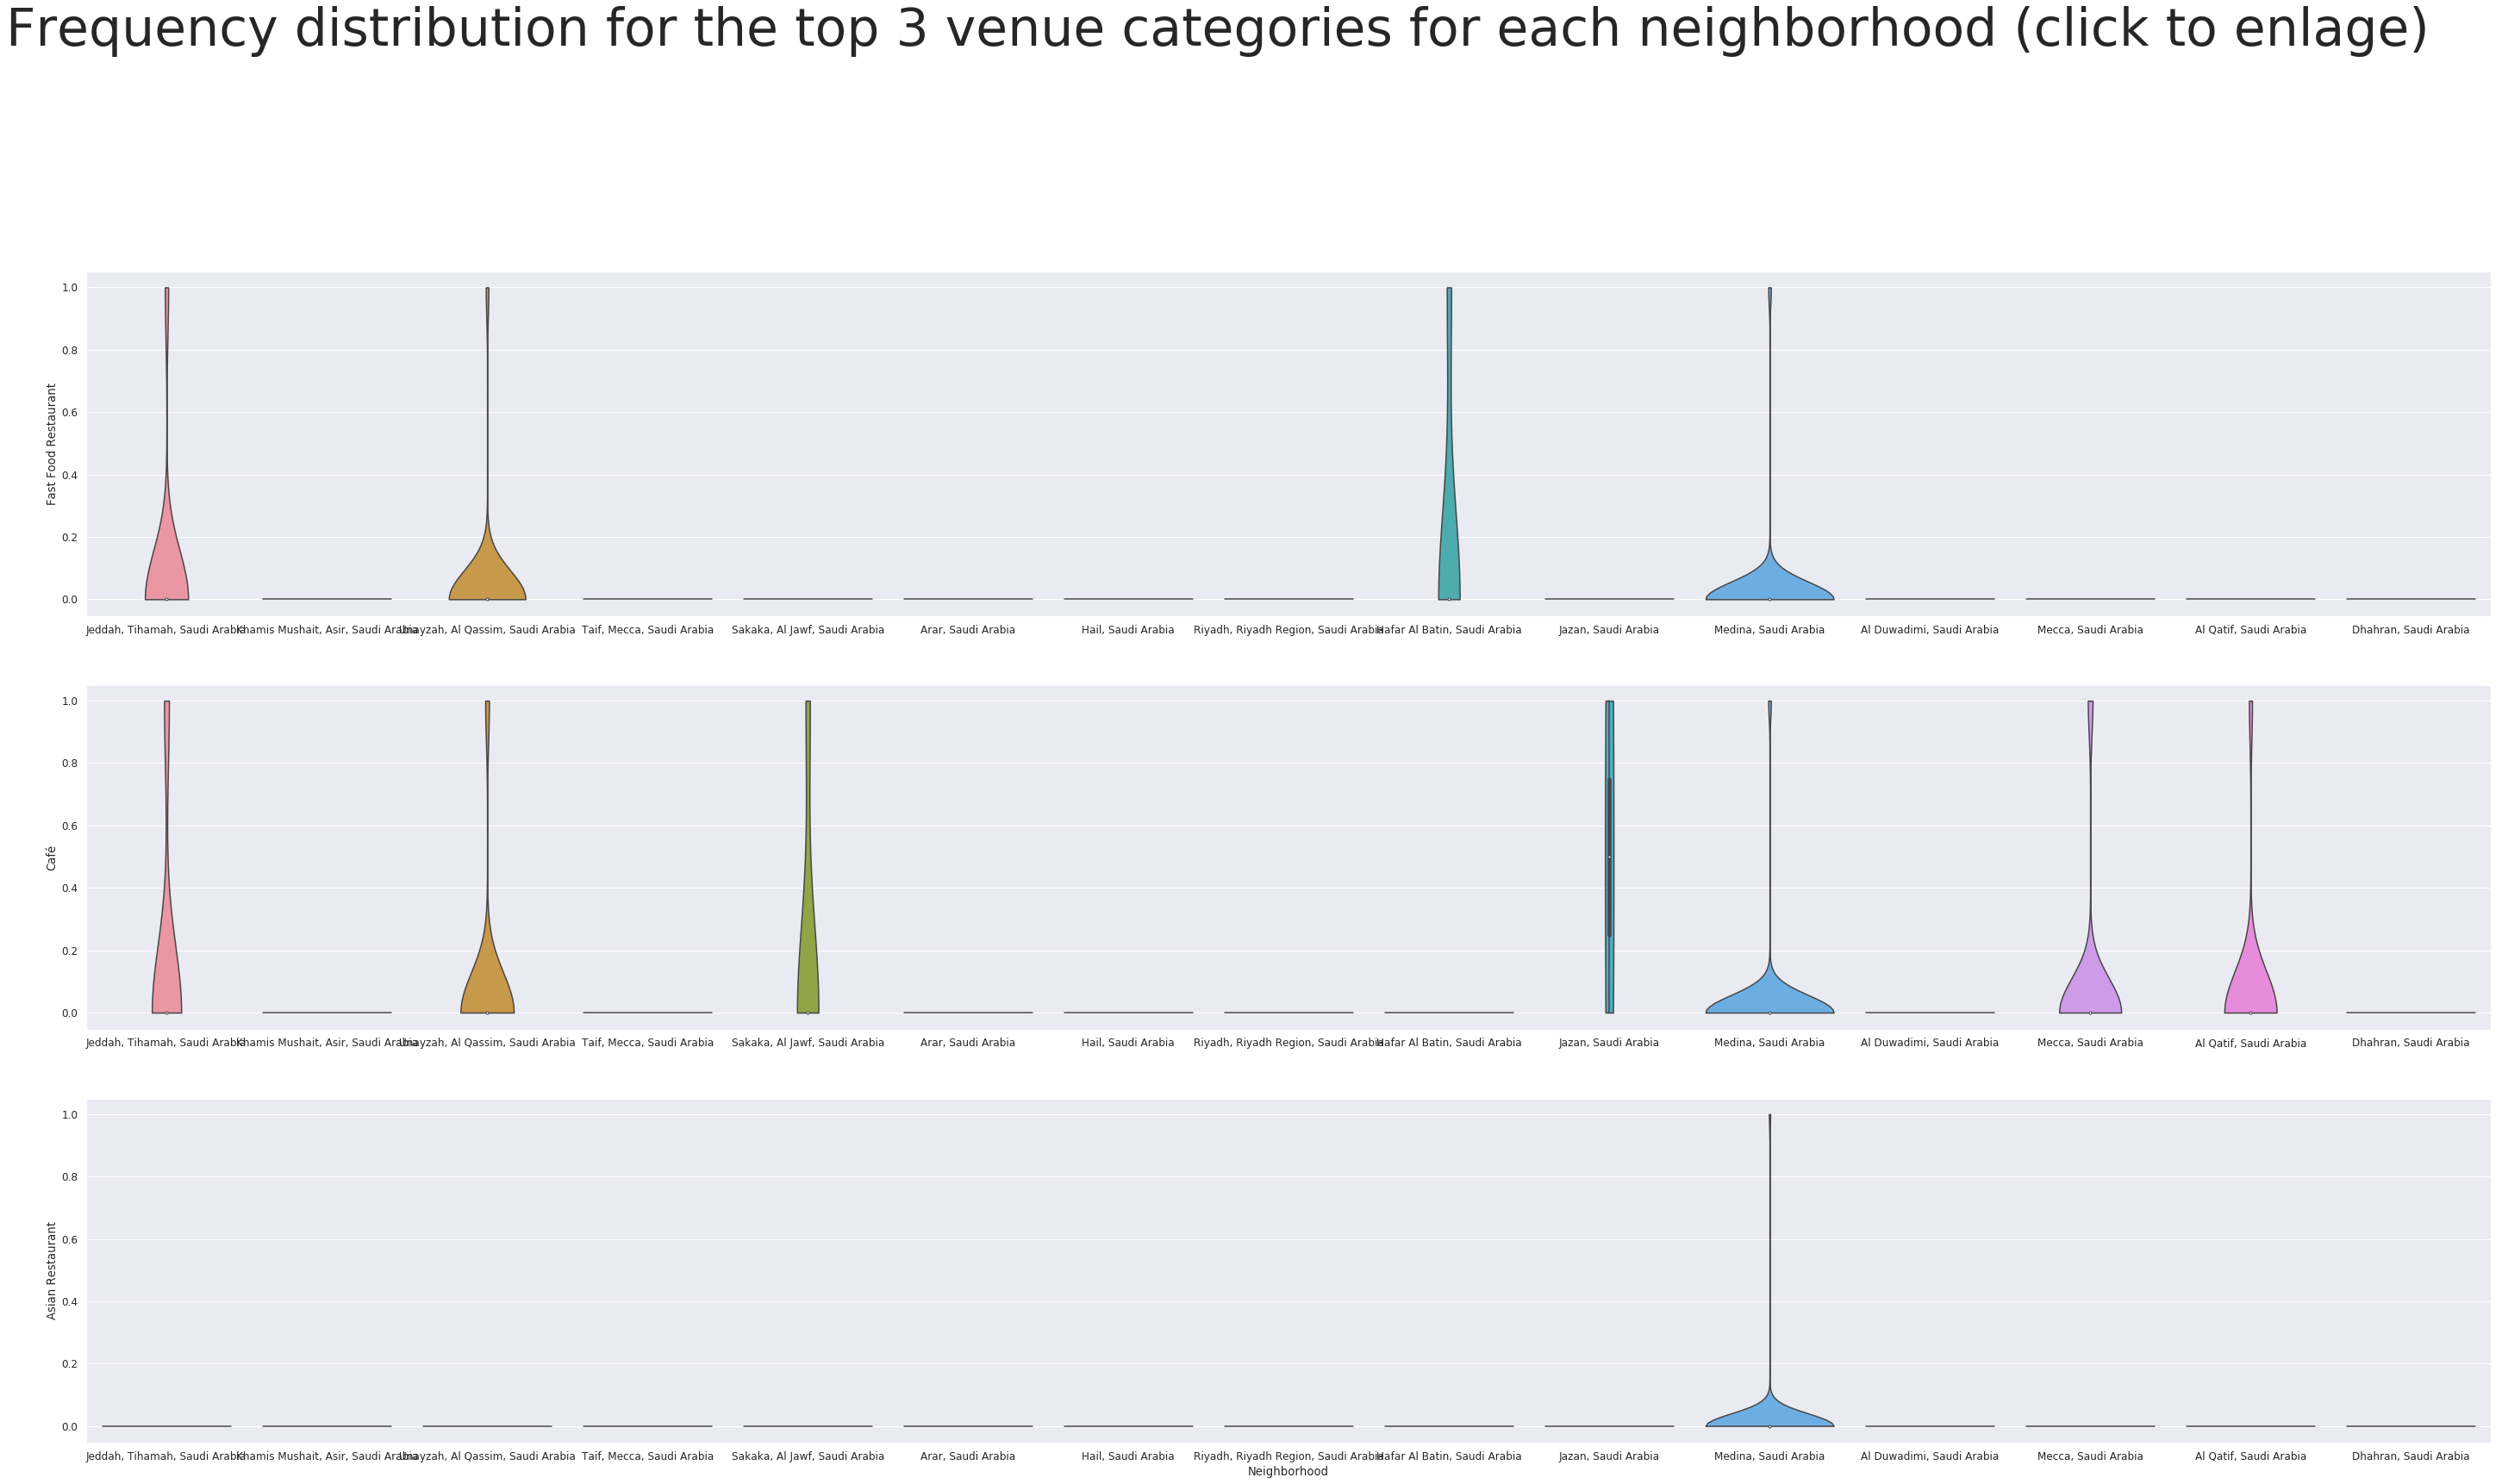

In [138]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import matplotlib.pyplot as plt

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Fast Food Restaurant", data=dammam_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=dammam_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Asian Restaurant", data=dammam_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

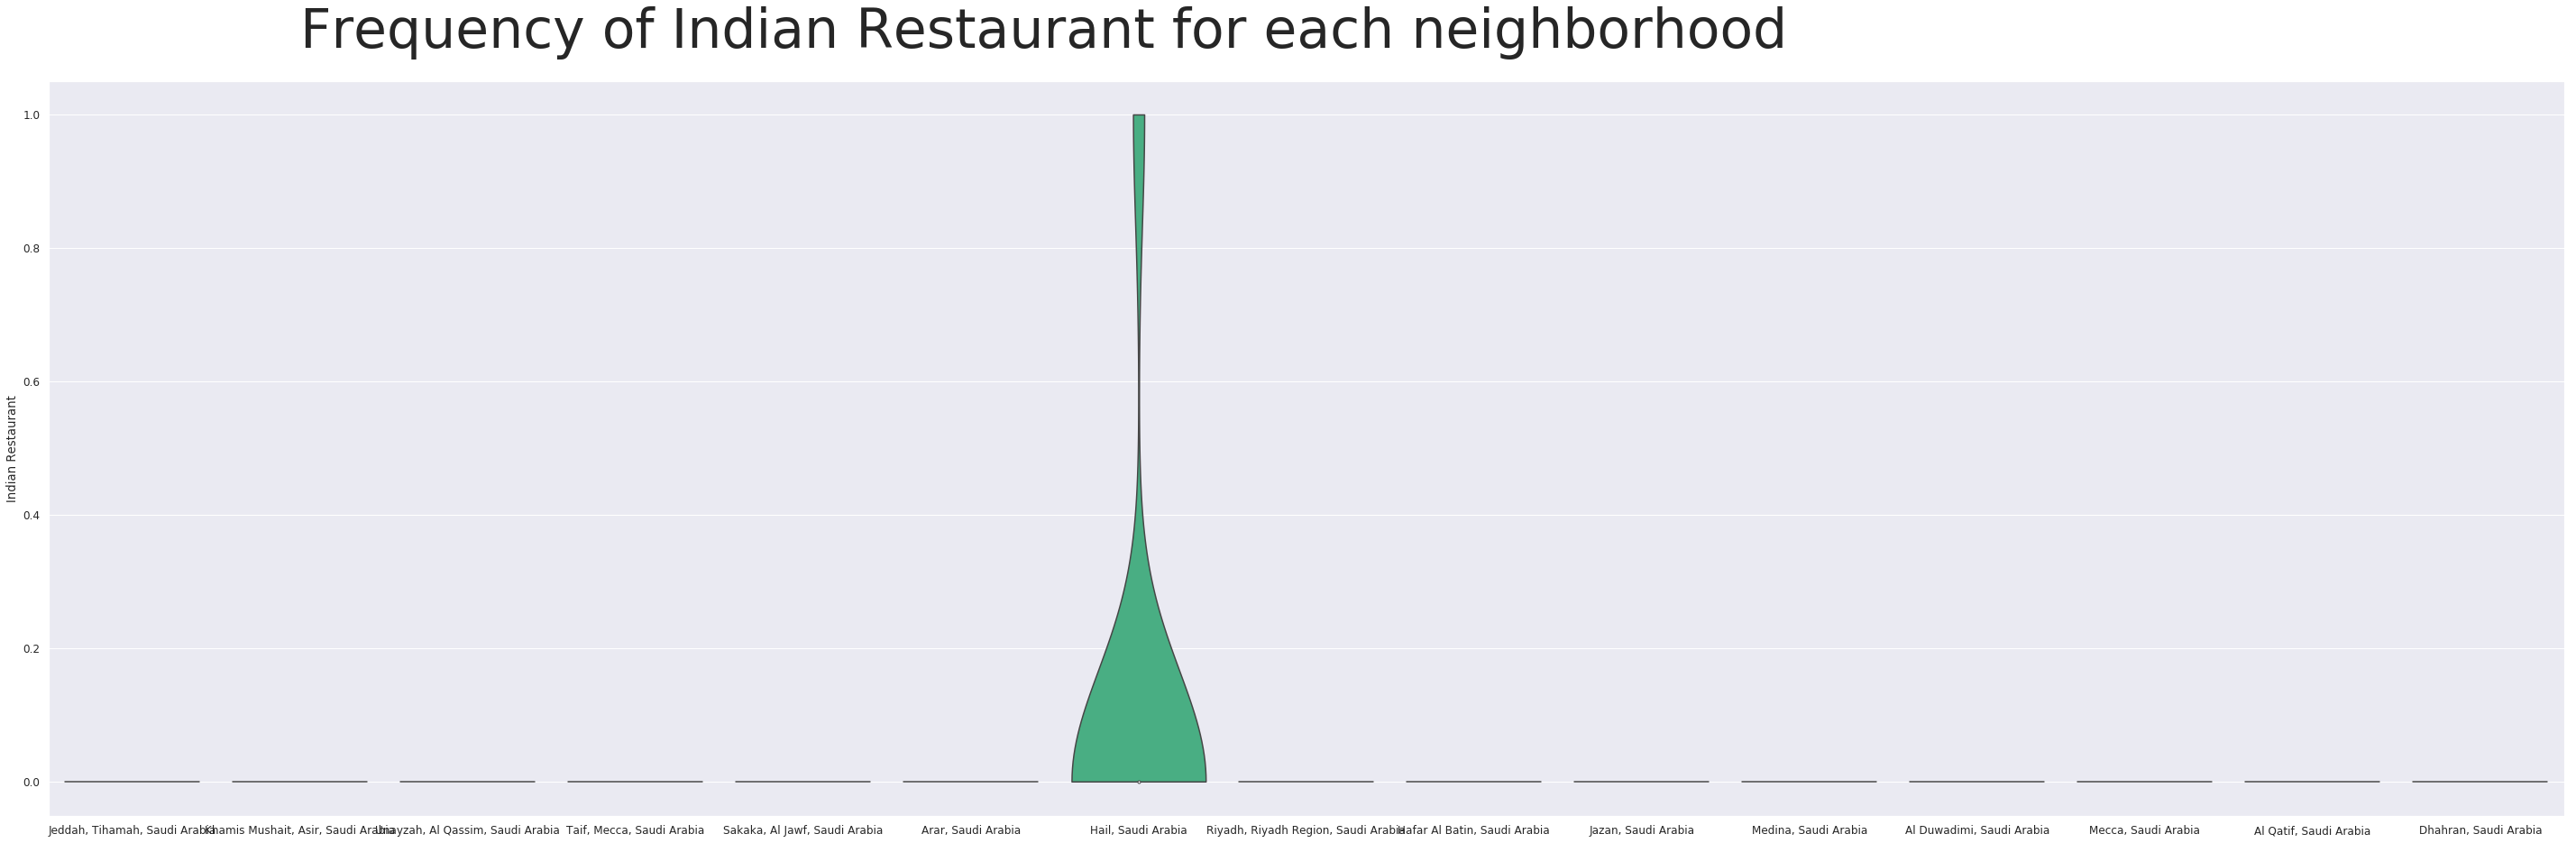

In [139]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=dammam_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Indian Restaurant for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

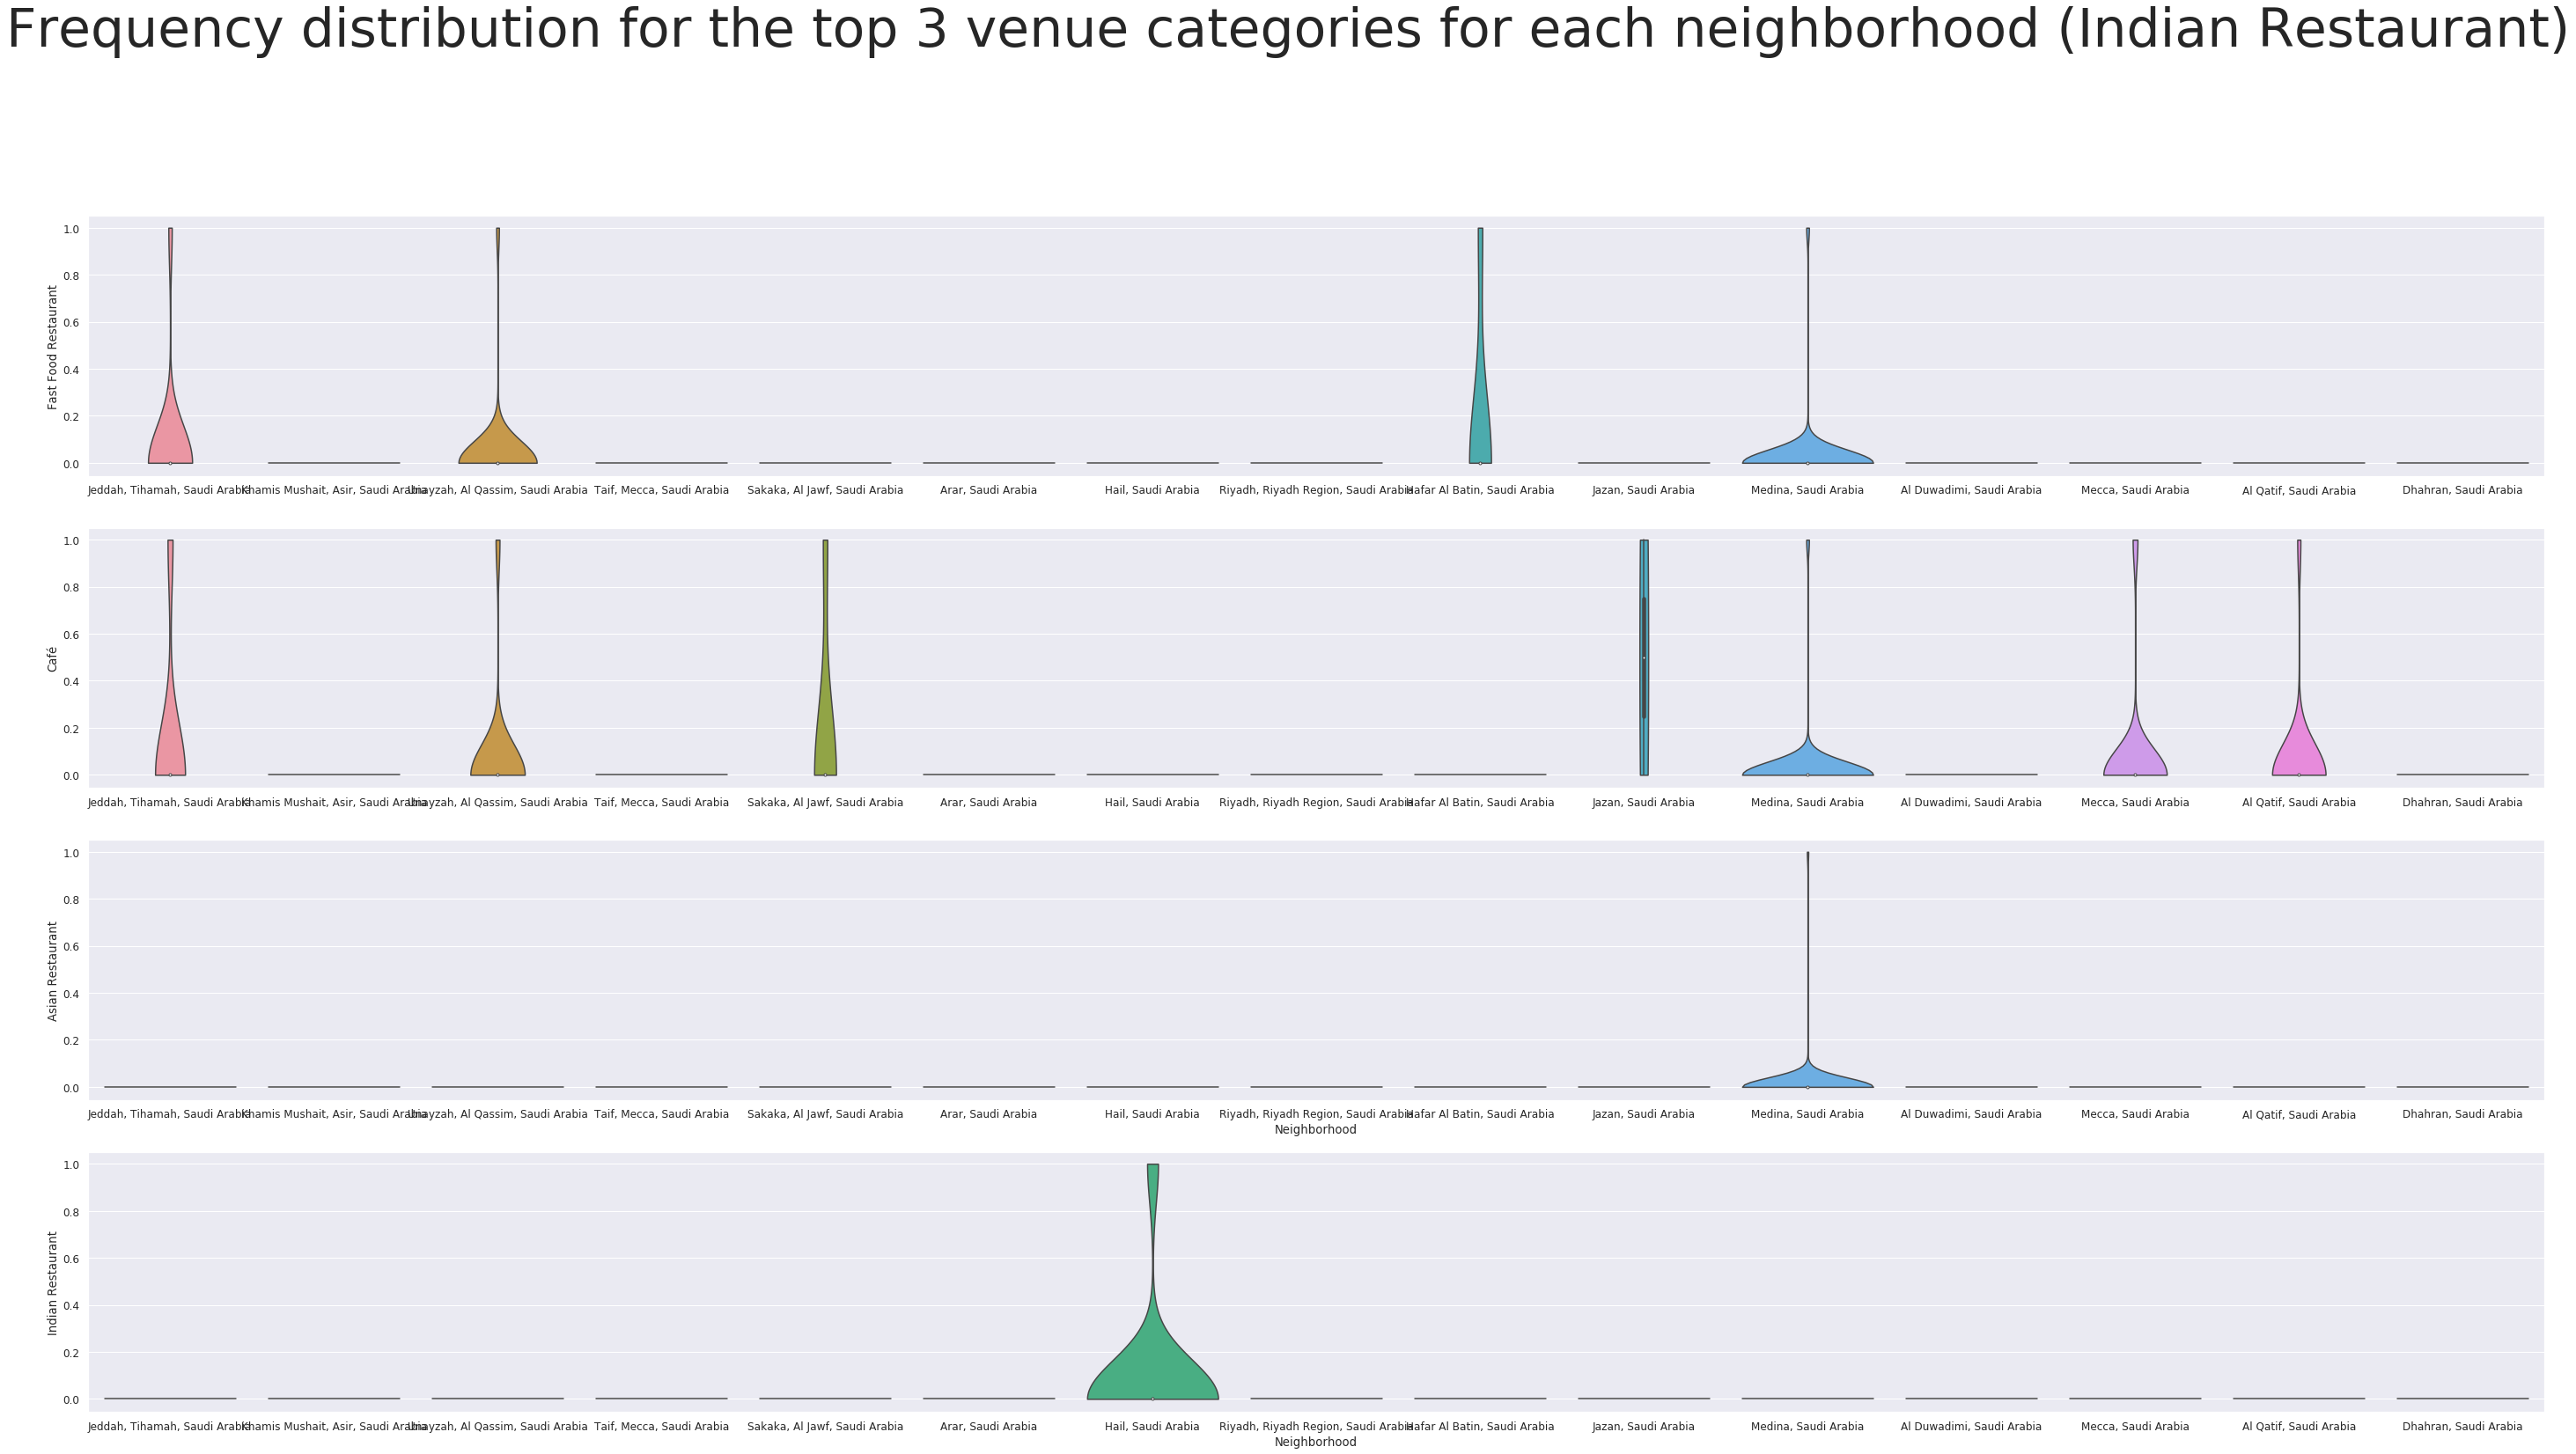

In [140]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Fast Food Restaurant", data=dammam_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=dammam_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Asian Restaurant", data=dammam_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=dammam_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (Indian Restaurant)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [141]:
# set number of clusters
kclusters = 5

dammam_grouped_clustering = dammam_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dammam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 4, 1, 3, 3], dtype=int32)

In [147]:
# add clustering labels
#dammam_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

dammam_merged = df_P

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dammam_merged = dammam_merged.join(dammam_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dammam_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Jeddah, Tihamah, Saudi Arabia",21.543333,39.172779,1.0,Café,Gift Shop,Pool Hall,Restaurant,Insurance Office,Cosmetics Shop,Fast Food Restaurant,Donut Shop,Boutique,Flower Shop
1,"Khamis Mushait, Asir, Saudi Arabia",18.329384,42.759365,3.0,Burger Joint,Gym,Hotel,Donut Shop,Farm,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant
2,"Harmah, Central Region, Saudi Arabia",25.994478,45.318161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Unayzah, Al Qassim, Saudi Arabia",26.094088,43.973454,1.0,Coffee Shop,Shopping Mall,Mobile Phone Shop,Café,Farm,Food Court,Flea Market,Fast Food Restaurant,Ice Cream Shop,Discount Store
4,"Industrial city 1, Dammam, Saudi Arabia",26.396790,50.140400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dammam_merged['Latitude'], dammam_merged['Longitude'], dammam_merged['Neighborhood'], dammam_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        
        fill=True,
         fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [160]:
dammam_merged.loc[dammam_merged['Cluster_Labels'] == 0, dammam_merged.columns[[0] + list(range(4, dammam_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,"Al Duwadimi, Saudi Arabia",Track,Women's Store,Falafel Restaurant,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop


In [161]:
dammam_merged.loc[dammam_merged['Cluster_Labels'] == 1, dammam_merged.columns[[0] + list(range(4, dammam_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Jeddah, Tihamah, Saudi Arabia",Café,Gift Shop,Pool Hall,Restaurant,Insurance Office,Cosmetics Shop,Fast Food Restaurant,Donut Shop,Boutique,Flower Shop
3,"Unayzah, Al Qassim, Saudi Arabia",Coffee Shop,Shopping Mall,Mobile Phone Shop,Café,Farm,Food Court,Flea Market,Fast Food Restaurant,Ice Cream Shop,Discount Store
6,"Sakaka, Al Jawf, Saudi Arabia",Dessert Shop,Grocery Store,Bakery,Coffee Shop,Breakfast Spot,Café,Falafel Restaurant,Diner,Discount Store,Dog Run
7,"Arar, Saudi Arabia",Flea Market,Falafel Restaurant,Gourmet Shop,Stationery Store,Women's Store,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
9,"Hail, Saudi Arabia",Arepa Restaurant,Shopping Mall,Floating Market,Gym / Fitness Center,Indian Restaurant,Doner Restaurant,Market,Department Store,Middle Eastern Restaurant,Cosmetics Shop
10,"Riyadh, Riyadh Region, Saudi Arabia",Coffee Shop,Gym / Fitness Center,Public Bathroom,Cafeteria,Women's Store,Electronics Store,Dessert Shop,Diner,Discount Store,Dog Run
11,"Hafar Al Batin, Saudi Arabia",Women's Store,Irish Pub,Middle Eastern Restaurant,Clothing Store,National Park,Fast Food Restaurant,Dessert Shop,Diner,Discount Store,Dog Run
17,"Al Qatif, Saudi Arabia",Middle Eastern Restaurant,Buffet,Coffee Shop,Soccer Stadium,Mountain,Intersection,Pharmacy,Café,Restaurant,Department Store
18,"Dhahran, Saudi Arabia",Soccer Field,Skate Park,Department Store,Dog Run,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Eastern European Restaurant


In [162]:
dammam_merged.loc[dammam_merged['Cluster_Labels'] == 2, dammam_merged.columns[[0] + list(range(4, dammam_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Taif, Mecca, Saudi Arabia",Cable Car,Women's Store,Cosmetics Shop,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant


In [163]:
dammam_merged.loc[dammam_merged['Cluster_Labels'] == 3, dammam_merged.columns[[0] + list(range(4, dammam_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Khamis Mushait, Asir, Saudi Arabia",Burger Joint,Gym,Hotel,Donut Shop,Farm,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant
14,"Medina, Saudi Arabia",Hotel,Shopping Mall,Ice Cream Shop,Coffee Shop,Donut Shop,Clothing Store,Mobile Phone Shop,Café,Fast Food Restaurant,Gift Shop
16,"Mecca, Saudi Arabia",Hotel,Café,Restaurant,Ice Cream Shop,Coffee Shop,Lounge,Shopping Mall,Convenience Store,Malay Restaurant,Market


In [164]:
dammam_merged.loc[dammam_merged['Cluster_Labels'] == 4, dammam_merged.columns[[0] + list(range(4, dammam_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Jazan, Saudi Arabia",Concert Hall,Café,Women's Store,Falafel Restaurant,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop


### Conclusion: After examining the above 5 clusters, we can recommend our stakeholders that Macca and Madina are the best neighborhoods in Saudi Arabia, to open their Indian restuarant. This is because in these areas, the most common venue visited by the public is the hotel and as these areas are highly populated with asians, opening an Indian restuarant would definitley be a good idea.